In [14]:
# Problem Statement : To construct a linear model that explains the relation between car mileage and other attributes.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
nn=pd.read_csv("auto-mpg.csv")

In [17]:
nn.shape

(398, 9)

In [18]:
nn.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl
306,28.8,6,173.0,115,2595,11.3,79,1,chevrolet citation
360,30.7,6,145.0,76,3160,19.6,81,2,volvo diesel
83,28.0,4,98.0,80,2164,15.0,72,1,dodge colt (sw)
335,35.0,4,122.0,88,2500,15.1,80,2,triumph tr7 coupe
233,29.0,4,97.0,78,1940,14.5,77,2,volkswagen rabbit custom
153,18.0,6,250.0,105,3459,16.0,75,1,chevrolet nova
94,13.0,8,440.0,215,4735,11.0,73,1,chrysler new yorker brougham
70,13.0,8,400.0,190,4422,12.5,72,1,chrysler newport royal
326,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)


In [19]:
nn.drop("car name",axis=1,inplace=True)

In [20]:
nn['origin']=nn['origin'].replace({1:'America',2:'Europe',3:'Asia'})
nn.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
115,15.0,8,350.0,145,4082,13.0,73,America
378,38.0,4,105.0,63,2125,14.7,82,America
222,17.0,8,260.0,110,4060,19.0,77,America
146,28.0,4,90.0,75,2125,14.5,74,America
304,37.3,4,91.0,69,2130,14.7,79,Europe
328,30.0,4,146.0,67,3250,21.8,80,Europe
388,26.0,4,156.0,92,2585,14.5,82,America
154,15.0,6,250.0,72,3432,21.0,75,America
104,12.0,8,400.0,167,4906,12.5,73,America
72,15.0,8,304.0,150,3892,12.5,72,America


In [21]:
nn=pd.get_dummies(nn,columns=['origin'])
nn.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
34,16.0,6,225.0,105,3439,15.5,71,1,0,0
163,18.0,6,225.0,95,3785,19.0,75,1,0,0
77,22.0,4,121.0,76,2511,18.0,72,0,0,1
368,27.0,4,112.0,88,2640,18.6,82,1,0,0
268,27.2,4,119.0,97,2300,14.7,78,0,1,0
362,24.2,6,146.0,120,2930,13.8,81,0,1,0
209,19.0,4,120.0,88,3270,21.9,76,0,0,1
260,18.6,6,225.0,110,3620,18.7,78,1,0,0
125,20.0,6,198.0,95,3102,16.5,74,1,0,0
90,12.0,8,429.0,198,4952,11.5,73,1,0,0


In [22]:
nn.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin_America    0
origin_Asia       0
origin_Europe     0
dtype: int64

In [23]:
nn.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

In [24]:
nn.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [25]:
nn.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000


In [26]:
nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    object 
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_America  398 non-null    uint8  
 8   origin_Asia     398 non-null    uint8  
 9   origin_Europe   398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(3)
memory usage: 23.1+ KB


In [27]:
hpIsDigit=pd.DataFrame(nn.horsepower.str.isdigit())
nn[hpIsDigit['horsepower']== False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [28]:
nn['horsepower']=nn['horsepower'].replace("?",np.nan)
nn['horsepower']=nn['horsepower'].astype(float)

In [31]:
median1=nn['horsepower'].median()
median1

93.5

In [33]:
nn['horsepower'].replace(np.nan,median1,inplace=True)

In [34]:
nn.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower        float64
weight              int64
acceleration      float64
model year          int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

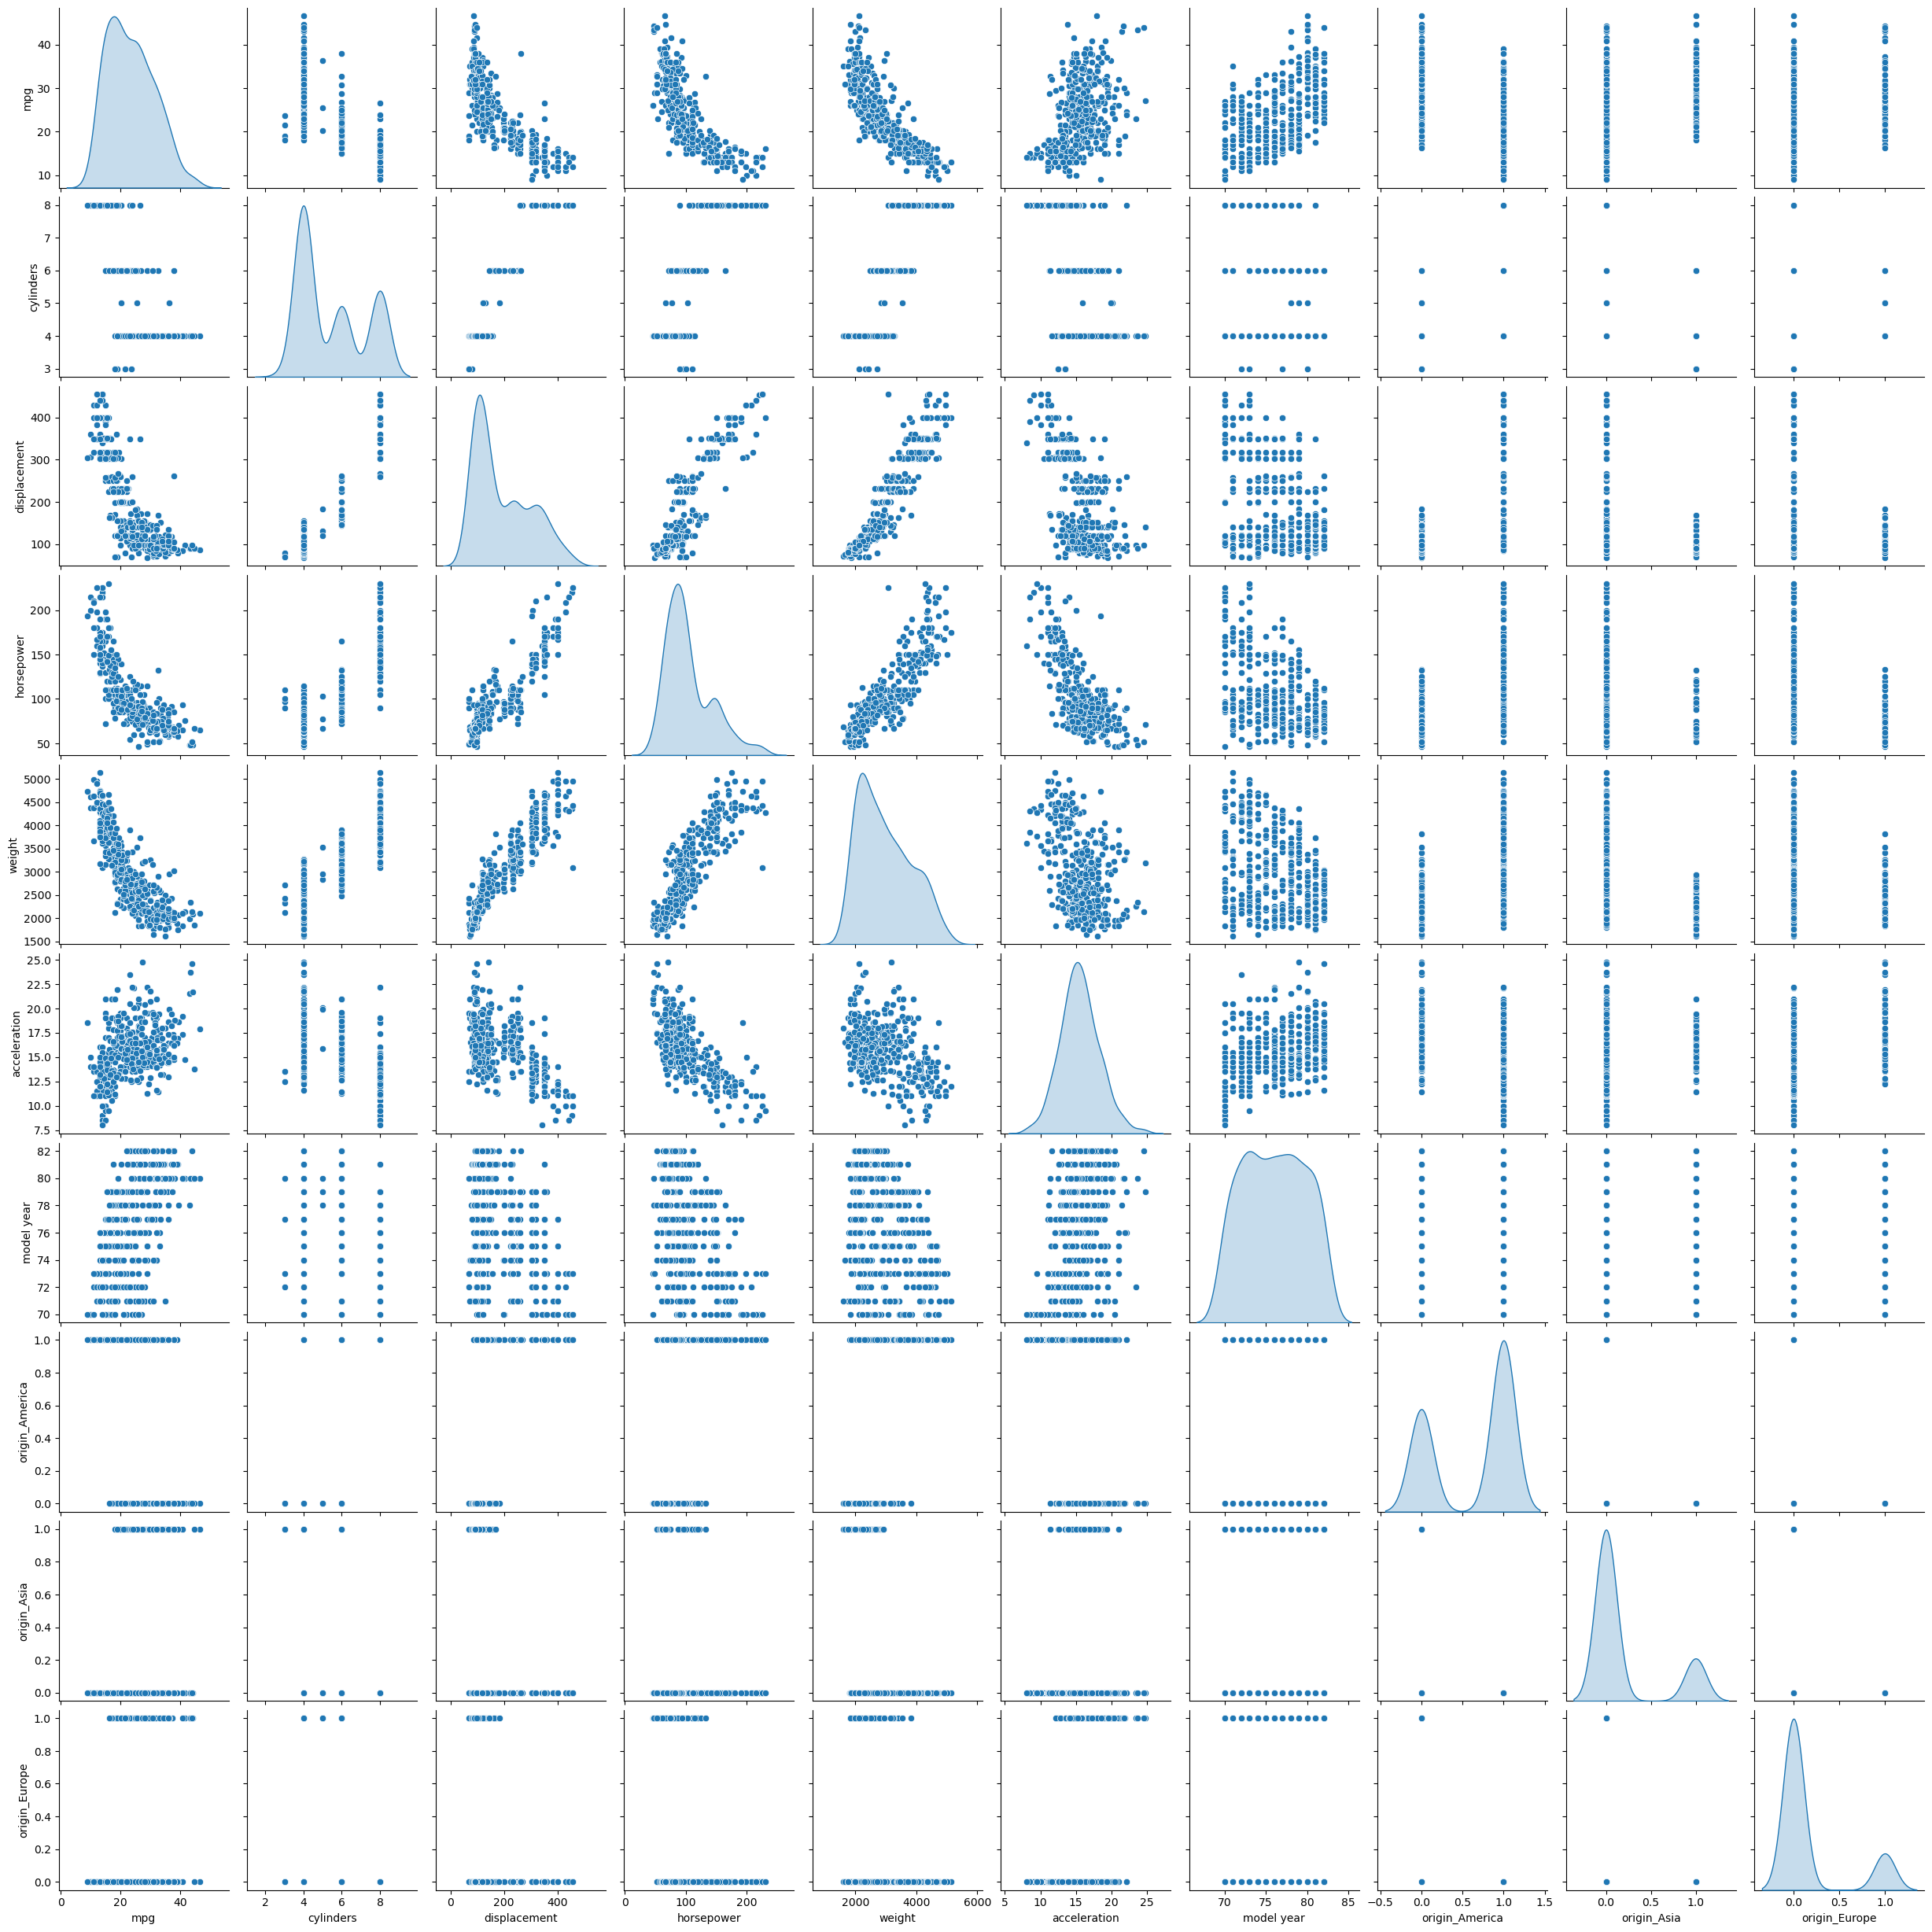

In [35]:
sns.pairplot(nn,diag_kind="kde")

In [36]:
nn.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower        float64
weight              int64
acceleration      float64
model year          int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

In [37]:
nn.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin_America    0
origin_Asia       0
origin_Europe     0
dtype: int64

In [38]:
X = nn.drop(['mpg'],axis=1)
y = nn[['mpg']]

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [43]:
model_1=LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

In [44]:
model_1.score(X_train,y_train)

0.8215521225570098

In [45]:
model_1.score(X_test,y_test)

0.8226939742691545